In [7]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_range = np.array([0, 1])

In [4]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [6]:
integrate.quad(f, 0.4, 0.6)

(0.19999999999999996, 2.2204460492503127e-15)

In [13]:
y_value = [f(i) for i in x_range]

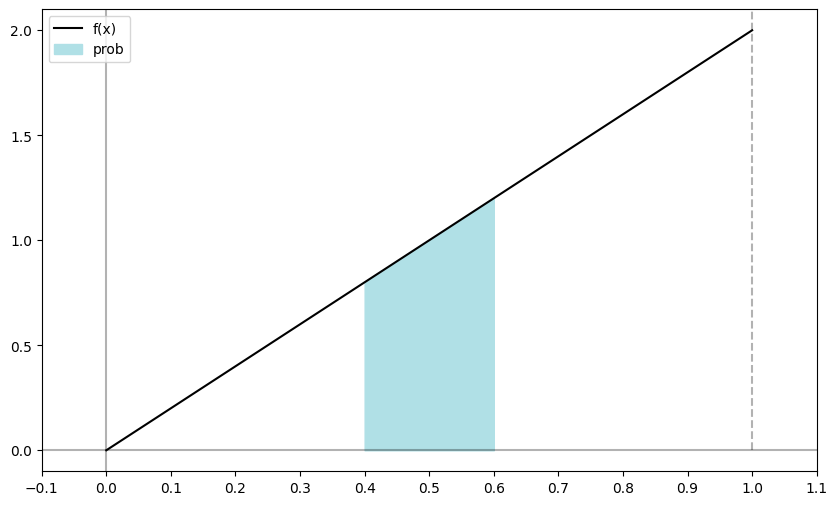

In [52]:
fig, axs = plt.subplots(figsize = (10, 6))
axs.plot(x_range, y_value, color = 'black', label = 'f(x)')

axs.hlines(y = 0, xmin = -0.1, xmax = 1.1, alpha = 0.3, colors = 'black')
axs.vlines(x = 0, ymin = -0.1, ymax = 2.1, alpha = 0.3, colors = 'black')
axs.vlines(x = 1, ymin = 0, ymax = 2.1, alpha = 0.3, colors = 'black', linestyles = '--')

axs.set_xlim(left = -0.1, right = 1.1)
axs.set_ylim(bottom = -0.1, top = 2.1)

axs.set_xticks(np.arange(-0.1, 1.2, 0.1))
axs.set_yticks(np.arange(0, 2.1, 0.5))

xs = np.linspace(0.4, 0.6, 100)
ys = [f(i) for i in xs]
axs.fill_between(xs, ys, color = 'powderblue', label = 'prob')

plt.legend()
plt.show()

In [55]:
integrate.quad(f, -np.inf, np.inf)[0]

1.0

In [56]:
from scipy.optimize import minimize_scalar

In [59]:
minimize_scalar(f)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0
       x: -1.6180339754913822
     nit: 37
    nfev: 40

In [60]:
integrate.quad(f, -np.inf, np.inf)

(1.0, 2.5284034865791227e-09)

In [61]:
x2 = lambda x : x ** 2
integrate.quad(x2, 0, 4)

(21.333333333333332, 2.3684757858670003e-13)

In [64]:
invexp = lambda x : np.exp(-x)
integrate.quad(invexp, 0, np.inf)

(1.0, 5.842605965544164e-11)

In [65]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [66]:
F(0.6) - F(0.4)

0.20000000000014648

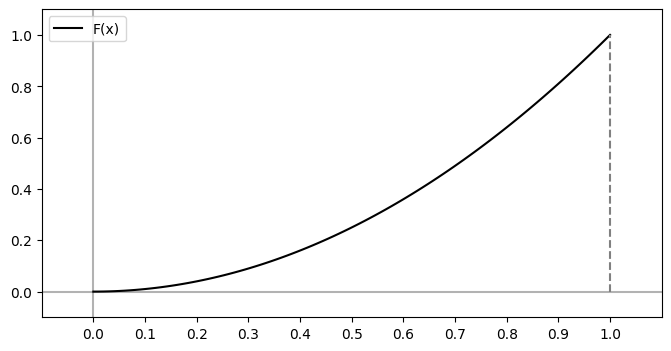

In [80]:
x = np.linspace(0, 1, 100)
y = [F(i) for i in x]

fig, axs = plt.subplots(figsize = (8, 4))
axs.plot(x, y, color = 'black', label = 'F(x)')

axs.set_xlim(-0.1, 1.1)
axs.set_ylim(-0.1, 1.1)

axs.vlines(x = 0, ymin = -0.1, ymax = 1.1, alpha = 0.3, colors = 'black')
axs.hlines(y = 0, xmin = -0.1, xmax = 1.1, alpha = 0.3, colors = 'black')
axs.vlines(x = 1, ymin = 0, ymax = 1, linestyles = '--', colors = 'gray')

axs.set_xticks(np.arange(0, 1.1, 0.1))

plt.legend()
plt.show()

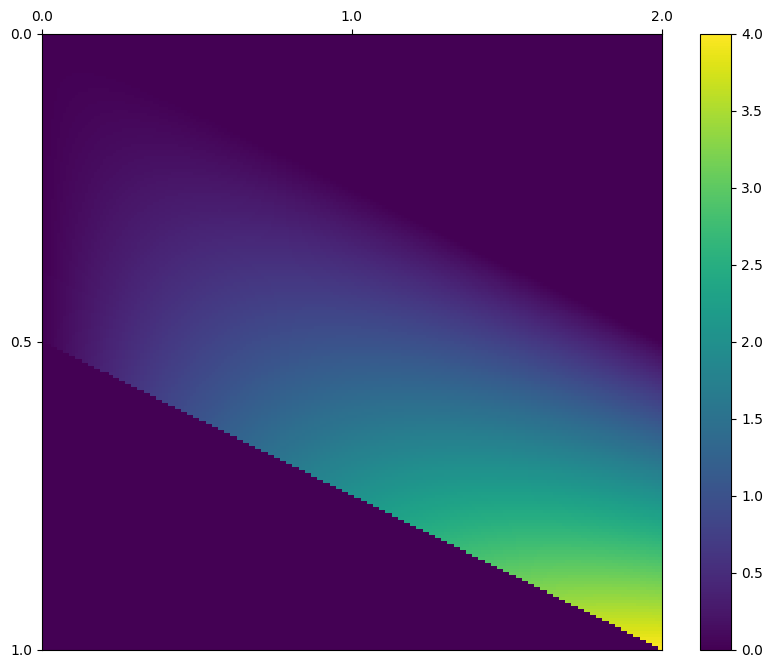

In [82]:
x_range = [0, 2]
y_range = [0, 1]

def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

XY = [x_range, y_range, f_xy]

xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor = False)
ax.set_yticks(np.linspace(0, 200, 3), minor = False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax = ax)
plt.show()

In [125]:
import scipy.stats as stats

norm_dist = stats.norm(loc = 0, scale = 1)
random_sample = norm_dist.rvs(size = 10)
random_sample

array([-0.69237605,  1.11562887,  1.6849194 , -1.81985132, -0.42752394,
        0.30258302,  0.1483836 , -0.73872914,  0.35749348,  2.59398503])

In [126]:
x = np.linspace(-3, 3, 1000)
y = [norm_dist.pdf(i) for i in x]

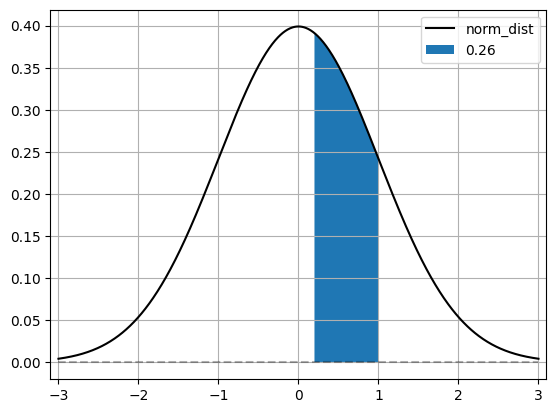

In [142]:
fig, axs = plt.subplots()

axs.plot(x, y, color = 'black', label = 'norm_dist')

axs.hlines(y = 0, xmin = -3, xmax = 3, color = 'black', alpha = 0.3, linestyles = '--')

xs = np.linspace(0.2, 1, 100)
xy = [norm_dist.pdf(i) for i in xs]

axs.fill_between(xs, xy, label = f'{round(norm_dist.cdf(1) - norm_dist.cdf(0.2), 2)}')
axs.set_xlim(-3.1, 3.1)

plt.legend()
plt.grid()
plt.show()

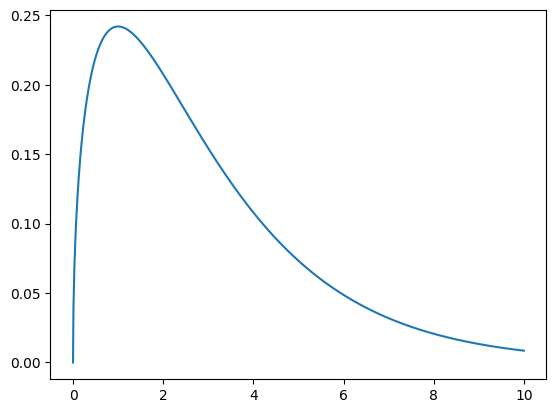

In [120]:
chi2 = stats.chi2(df = 3)
x = np.linspace(0, 10, 1000)
y2 = [chi2.pdf(i) for i in x]

plt.plot(x, y2)
plt.show()

In [149]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 생성
data = pd.DataFrame({
    'pclass': [1, 2, 3, 1, 2, 3],
    'age': [22, 35, 58, 45, 23, 36],
    'survived': [1, 0, 1, 0, 1, 0]
})

# 독립 변수(X)와 종속 변수(y) 분리
X = data[['pclass', 'age']]
y = data['survived']

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# 로지스틱 회귀 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 회귀 계수 및 절편 추출
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("회귀 계수:", coefficients)
print("절편:", intercept)


회귀 계수: [-0.0676995  -0.91447009]
절편: -0.43492162085686564
